In [1]:
# Vishakha Dixit
# 801265288
# HW-2

from sklearn.datasets import load_breast_cancer 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.decomposition import PCA 

In [2]:
# Problem 1
# Use the cancer dataset to build a Naïve Bayesian model to classify the type of cancer (Malignant vs. benign). 
# Plot your classification accuracy, precision, and recall over a different number of Ks. 
# Explain and elaborate on your results. Can you compare your results against the logistic 
# regression classifier you did in previous homework.

In [3]:
#variable to hold data
breast_cancer = load_breast_cancer()

input_data = pd.DataFrame(breast_cancer.data)
input_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#data labels
labels=breast_cancer.target
labels.shape

(569,)

In [5]:
#reshape data into usefull info
labels = np.reshape(labels,(569,1))
#Add label to data set
final_breast_data = np.concatenate([input_data,labels],axis=1)

In [6]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast_cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
features_labels = np.append(features,'test')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,test
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
#spliting the outcome of data
X =  breast_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,29]].values
Y = breast_dataset.iloc[:, 30].values

#Split the data set into test and verifcaiton 80.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=.2, random_state = 4) 

In [9]:
classifier = GaussianNB() 
classifier.fit(X_train, Y_train) 

GaussianNB()

In [10]:
#Test the Model
Y_pred = classifier.predict(X_test)

#Getting the metrics for Gaussian Naive-Bayes
print("Accuracy for Problem1:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision for Problem1:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall for Problem1:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy for Problem1: 0.9122807017543859
Precision for Problem1: 0.972972972972973
Recall for Problem1: 0.9


Text(0.5, 257.44, 'Predicted label')

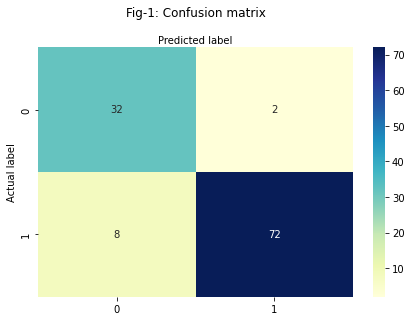

In [11]:
#Plotting the heat map for Logistic Regression 
class_names=['Benign','Malignant'] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,Y_pred)), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Fig-1: Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [12]:
# Problem 2
# Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). 
# Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). 
# Identify the optimum number of K, principal components that achieve the highest classification accuracy. 
# Plot your classification accuracy, precision, and recall over a different number of Ks. 
# Explain and elaborate on your results.

In [13]:
# First, import the PCA function
# sperate the  features, target and scaler

x = breast_dataset.loc[:, features].values 
y = breast_dataset.loc[:,['test']].values 
x = StandardScaler().fit_transform(x) 


accuracyGraph = []
precisionGraph = []
recallGraph = []

In [14]:
# to go through all K values, a k loop is needed for all the inputes up to 30
avg = 0
for k in range(1, 31):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)]) 
    finalDf = pd.concat([principalDf, breast_dataset[['test']]], axis = 1)
    
    outcome = finalDf.pop("test")
    
    X2 = finalDf.values
    Y2 = outcome.values

    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = 4) 
    #Same rand value to see the most optimal K value
    
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, Y_train)
    
    # Creating a prediction 
    Y_pred = classifier.predict(X_test)

    # Using confusion matrix to obtain accuracy and other statistics
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 
    from sklearn import metrics
    
    # Variables to hold the Accuracy, Precision, and Recall
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    
    # Saving the values to the appropriate list
    accuracyGraph.append(accuracy)
    precisionGraph.append(precision)
    recallGraph.append(recall)
    
    # Averaging the three values for avg
    New_Avg = (accuracy + precision + recall)/3
    
    #compare the old average from the first classifcation to the new one from 1 to 30
    #But use the most accurage model
    if avg < New_Avg: 
        avg = New_Avg
        index = k

In [15]:
# PCA function for the most optimal K value
# The most optimal K value was 8 for this test 

pca = PCA(n_components = index)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,index+1)]) 
finalDf = pd.concat([principalDf, breast_dataset[['test']]], axis = 1)

X2 = finalDf.values
Y2 = outcome.values

# Standard training and test set 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = 4)

classifier.fit(X_train, Y_train)
    
#Create a prediction 
Y_pred = classifier.predict(X_test)

In [16]:
# Using confusion matrix to obtain accuracy and other statistics 
cnf_matrix = confusion_matrix(Y_test, Y_pred)  

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("Final K value: ", index)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Final K value:  8


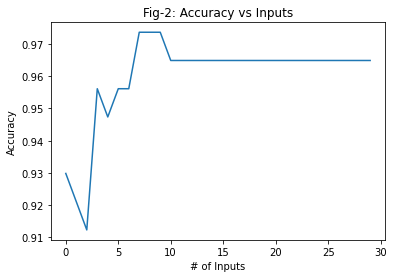

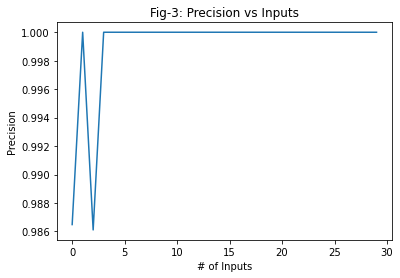

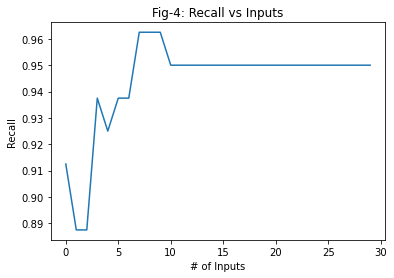

In [17]:
# Graph Accuracy
plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Fig-2: Accuracy vs Inputs')
plt.show()

# Graph Precision
plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Fig-3: Precision vs Inputs')
plt.show()

# Graph Precision
plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Fig-4: Recall vs Inputs')
plt.show()

In [18]:
# Problem 3
# Can you repeat problem 2? This time, replace the logistic regression with Bayes classifier. 
# Report your results (classification accuracy, precision, and recall). 
# Compare your results against problem 2.

In [19]:
accuracyGraph = []
precisionGraph = []
recallGraph = []

In [20]:
avg = 0
for k in range(1, 31):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)]) 
    finalDf = pd.concat([principalDf, breast_dataset[['test']]], axis = 1)
    
    outcome = finalDf.pop("test")
    
    X2 = finalDf.values
    Y2 = outcome.values

    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = 4) 
    
    # Using Naive Bayes Classifier for Problem 2 above
    classifier = GaussianNB() 
    classifier.fit(X_train, Y_train)
    
    # Creating a prediction 
    Y_pred = classifier.predict(X_test)

    # Using confusion matrix to obtain accuracy and other statistics
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 
    
    # Variables to hold the Accuracy, Precision, and Recall
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    
    # Saving the values to the appropriate list
    accuracyGraph.append(accuracy)
    precisionGraph.append(precision)
    recallGraph.append(recall)
    
    # Averaging the three values for avg
    New_Avg = (accuracy + precision + recall)/3
    
    #compare the old average from the first classifcation to the new one from 1 to 30
    #But use the most accurage model
    if avg < New_Avg: 
        avg = New_Avg
        index = k

In [21]:
# PCA function for the most optimal K value
# The most optimal K value was 30 for this test 

pca = PCA(n_components = index)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,index+1)]) 
finalDf = pd.concat([principalDf, breast_dataset[['test']]], axis = 1)

X2 = finalDf.values
Y2 = outcome.values

# Standard training and test set 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = 4)

classifier.fit(X_train, Y_train)
    
#Create a prediction 
Y_pred = classifier.predict(X_test)

In [22]:
# Using confusion matrix to obtain accuracy and other statistics 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("Final K value: ", index)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Final K value:  1


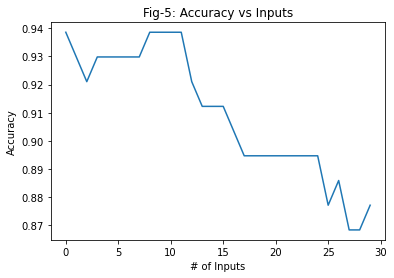

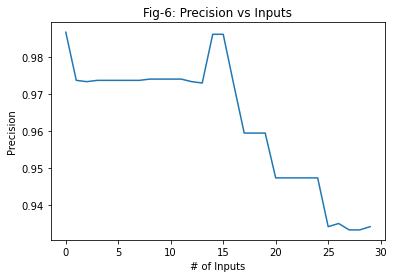

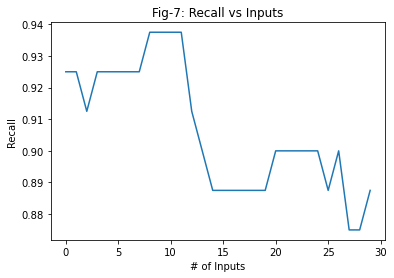

In [23]:
# Graph Accuracy
plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Fig-5: Accuracy vs Inputs')
plt.show()

# Graph Precision
plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Fig-6: Precision vs Inputs')
plt.show()

# Graph Precision
plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Fig-7: Recall vs Inputs')
plt.show()